In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

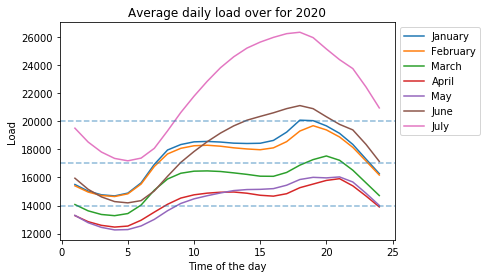

In [366]:
data=pd.read_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Summer 2020/Energy Storage/nyiso_loads.csv')
data=data.drop(columns='Hr25')
l=np.array(data.groupby('Month').get_group(1).mean())[3:]
t=np.linspace(1,24,24)
m=data['Month'].unique()
for x in m:
    l=np.array(data.groupby('Month').get_group(x).mean())[3:]
    t=np.linspace(1,24,24)    
    plt.plot(t,l,label=calendar.month_name[x])
    plt.xlabel('Time of the day')
    plt.ylabel('Load')
    plt.title('Average daily load over for 2020')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.axhline(14000,ls='--',alpha=0.5)
plt.axhline(17000,ls='--',alpha=0.5)
plt.axhline(20000,ls='--',alpha=0.5)
plt.show()

In [367]:
dd=data.groupby('Month').mean()

In [368]:
thresh=np.linspace(1000,35000,100)
hrr=np.linspace(1,24,24).astype(int)

In [369]:
df=data.groupby('Month').mean()
p=[]
for tr in thresh:
    u=[]
    for h in hrr:
        dd=data[f'Hr{h}']
        u.append(dd[dd>tr].tolist())
    uu=[item for sublist in u for item in sublist]
    p.append(uu)

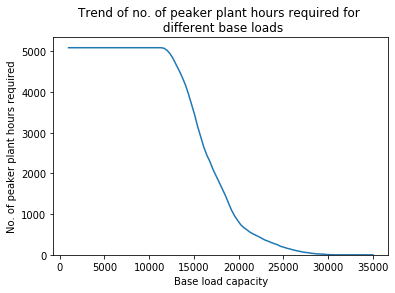

In [370]:
peak=[]
for i,x in enumerate(p):
    peak.append(len(x))
plt.plot(thresh,peak)
plt.ylim(0)
plt.xlabel('Base load capacity')
plt.ylabel('No. of peaker plant hours required')
plt.title('Trend of no. of peaker plant hours required for \n different base loads')
plt.show()

As per: https://www.ge.com/power/transform/article.transform.articles.2017.jun.load-following-power-plant#:~:text=of%20high%20demand.-,These%20plants%20typically%20run%20less%20than%201%2C500%20hours%20per%20year,period%2C%20and%20then%20shut%20down. <br>
Peaker plants run for roughly 1500 to 250 hrs per year
<br> Roughly 16 peaker plants in NYC (https://www.google.com/search?q=number+of+peaker+plants+in+nyc&rlz=1C1CHBD_enUS863US863&oq=number+of+peaker+plants+in+nyc&aqs=chrome..69i57.3761j0j1&sourceid=chrome&ie=UTF-8)

Assuming uniform load for every peaker plant


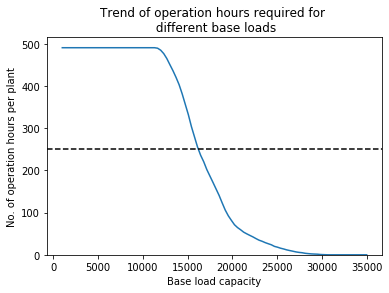

In [371]:
#Considering base load demand as 23000
n_peakers=16
n_month_scaling=12/7*0.9
print('Assuming uniform load for every peaker plant')
peak_load_adjusted=np.array(peak)*n_month_scaling/n_peakers
plt.plot(thresh,peak_load_adjusted)
plt.axhline(250,c='k',ls='--')
plt.ylim(0)
plt.xlabel('Base load capacity')
plt.ylabel('No. of operation hours per plant')
plt.title('Trend of operation hours required for \n different base loads')
plt.show()

In [372]:
hrs_max=max(peak_load_adjusted)
print(f'Consider a situation where each plant in NY runs for 300 hrs')

Consider a situation where each plant in NY runs for 300 hrs


For load in kWh: http://blog.drhongtao.com/2014/09/load-demand-energy-power.html

In [373]:
ind=np.where((peak_load_adjusted>=300) & (peak_load_adjusted<=350)) [0][-1]
base_load=thresh[ind]
base_load=15400
print(f'Base load is thus defined as {int(base_load)} kWh')
print('Based on analysis:')
print(f'We are looking at a peaker plant which runs for around {int(np.floor(hrs_max))} hrs per year, switched on \
when load is greater than {int(base_load)} kWh')

Base load is thus defined as 15400 kWh
Based on analysis:
We are looking at a peaker plant which runs for around 490 hrs per year, switched on when load is greater than 15400 kWh


In [374]:
base_load

15400

In [375]:
m=[]
for h in hrr:
    dd=df[f'Hr{h}']
    m.append(dd[dd>base_load].tolist())
m=[item for sublist in m for item in sublist]

In [376]:
    base_load

15400

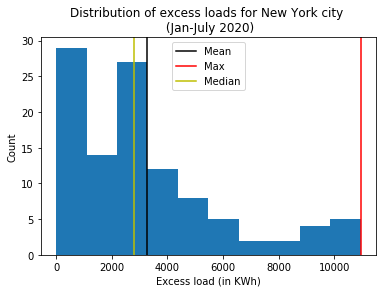

In [377]:
excess=np.array(m)-base_load
plt.hist(excess)
plt.axvline(np.mean(excess),c='k',label='Mean')
plt.axvline(np.max(excess),c='r',label='Max')
plt.axvline(np.median(excess),c='y',label='Median')
plt.legend()
plt.title('Distribution of excess loads for New York city \n (Jan-July 2020)')
plt.xlabel('Excess load (in KWh)')
plt.ylabel('Count')
plt.show()

In [378]:
print(f'A peaker plant thus has to cater to an average peak load of {np.mean(excess):1.2f} kWh,max load of \
{np.max(excess):1.2f} kWh and median load of {np.median(excess):1.2f} kWh')

A peaker plant thus has to cater to an average peak load of 3275.23 kWh,max load of 10935.50 kWh and median load of 2782.29 kWh


In [379]:
car=['Tesla Model 3','Tesla Model S','Chevrolet Volt','Cheverolet Bolt','Nissan Leaf']
cap=[75,100,18.4,66,40]
df={'Battery source':car,'Size (kWh)':np.array(cap)}
ty=pd.DataFrame(df)
print(ty.to_string(index=False))

  Battery source  Size (kWh)
   Tesla Model 3        75.0
   Tesla Model S       100.0
  Chevrolet Volt        18.4
 Cheverolet Bolt        66.0
     Nissan Leaf        40.0


In [380]:
#If first use directly:
mean_l=np.mean(excess)
max_l=np.max(excess)
med_l=np.median(excess)
mean_evs=mean_l/np.array(cap)/ch
max_evs=max_l/np.array(cap)/ch
med_evs=med_l/np.array(cap)/ch

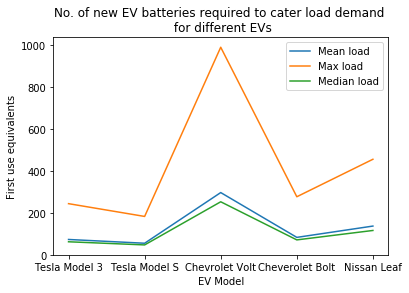

In [381]:
df={'Battery source':car,'Size (kWh)':np.array(cap),'First use Mean':np.ceil(mean_evs),'First use Max':np.ceil(max_evs),\
    'First use Median':np.ceil(med_evs)}
ty=pd.DataFrame(df)
plt.plot(ty['Battery source'],ty['First use Mean'],label='Mean load')
plt.plot(ty['Battery source'],ty['First use Max'],label='Max load')
plt.plot(ty['Battery source'],ty['First use Median'],label='Median load')
plt.legend()
plt.xlabel('EV Model')
plt.ylabel('First use equivalents')
plt.title('No. of new EV batteries required to cater load demand \n for different EVs')
plt.show()

Source for efficiency: https://cleantechnica.com/2018/03/10/electric-car-myth-buster-efficiency/#:~:text=According%20to%20the%20US%20Department,to%20power%20at%20the%20wheels.%E2%80%9D

In [382]:
#Second use batteries
cap=0.8 #80% working capacity
ch=0.6 #efficiency
suse_mean_evs=mean_evs/cap
suse_max_evs=max_evs/cap
suse_med_evs=med_evs/cap

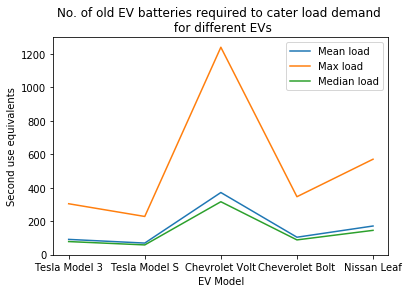

In [383]:
df2={'Battery source':car,'Size (kWh)':np.array(cap),'Second use Mean':np.ceil(suse_mean_evs),\
     'Second use Max':np.ceil(suse_max_evs),\
    'Second use Median':np.ceil(suse_med_evs)}
ty2=pd.DataFrame(df2)
plt.plot(ty2['Battery source'],ty2['Second use Mean'],label='Mean load')
plt.plot(ty2['Battery source'],ty2['Second use Max'],label='Max load')
plt.plot(ty2['Battery source'],ty2['Second use Median'],label='Median load')
plt.legend()
plt.xlabel('EV Model')
plt.ylabel('Second use equivalents')
plt.title('No. of old EV batteries required to cater load demand \n for different EVs')
plt.show()

In [384]:
ty.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Energy Project/firstuse.csv')
ty2.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Energy Project/seconduse.csv')